# Term Project Work Area

## EDA

In [3]:
# Importing libraries
import pandas as pd
import warnings

# Suppressing warnings
warnings.simplefilter("ignore")

# Load data
df = pd.read_excel("NDCP2022.xlsx")

# Averaging center child care

df['CCC'] = df[['MCBto5', 'MC6to11', 'MC12to17', 'MC18to23', 'MC24to29', 'MC30to35', 
                'MC36to41', 'MC42to47', 'MC48to53', 'MC54toSA', 'MCSA']].mean(axis=1)

df = df[['STATE_NAME', 'STATE_ABBREVIATION', 'COUNTY_NAME', 'COUNTY_FIPS_CODE', 'STUDYYEAR', 'CCC', 'MHI']]

# Data preview
df.head()

,STATE_NAME,STATE_ABBREVIATION,COUNTY_NAME,COUNTY_FIPS_CODE,STUDYYEAR,CCC,MHI
0,Alabama,AL,Autauga County,1001,2008,94.115455,50837
1,Alabama,AL,Autauga County,1001,2009,95.174545,51463
2,Alabama,AL,Autauga County,1001,2010,96.238182,53255
3,Alabama,AL,Autauga County,1001,2011,97.302727,53899
4,Alabama,AL,Autauga County,1001,2012,98.361818,53773


In [4]:
# Checking that MHI_2022 is county level and not just state
df_al_filter = df[(df['STATE_ABBREVIATION'] == "AL") & (df['STUDYYEAR'] == 2012)]
df_al_filter.head()

,STATE_NAME,STATE_ABBREVIATION,COUNTY_NAME,COUNTY_FIPS_CODE,STUDYYEAR,CCC,MHI
4,Alabama,AL,Autauga County,1001,2012,98.361818,53773
19,Alabama,AL,Baldwin County,1003,2012,102.277273,50706
34,Alabama,AL,Barbour County,1005,2012,83.650909,31889
49,Alabama,AL,Bibb County,1007,2012,94.070909,36824
64,Alabama,AL,Blount County,1009,2012,119.100909,45192


In [5]:
print(df[['CCC', 'MHI']].describe())

                CCC            MHI
count  35495.000000   48308.000000
mean     136.602003   48639.342366
std       46.191479   14909.270766
min       23.558182   10499.000000
25%      103.530909   39231.000000
50%      125.909091   46547.000000
75%      156.772727   55678.250000
max      523.868182  170463.000000


## Milestone 1

<Axes: title={'center': 'Average CCC Over Time'}, xlabel='STUDYYEAR'>

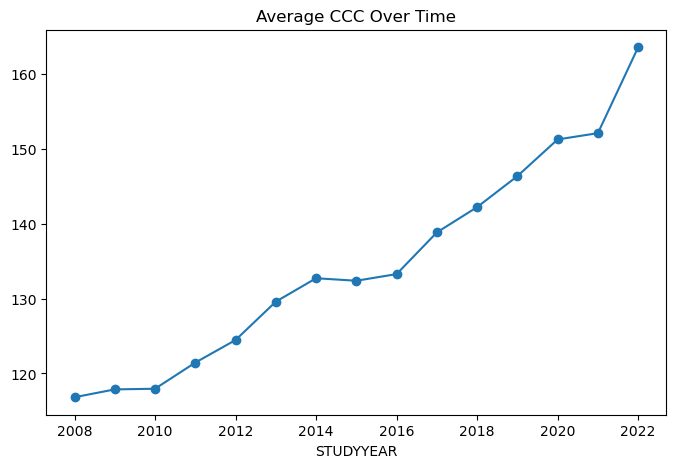

In [7]:
avg_by_year = df.groupby('STUDYYEAR')['CCC'].mean()
avg_by_year.plot(kind='line', marker='o', figsize=(8,5), title='Average CCC Over Time')

<Figure size 1000x600 with 0 Axes>

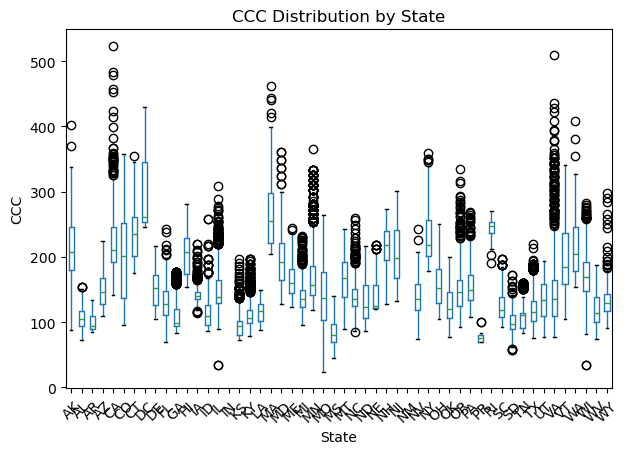

In [8]:
import matplotlib.pyplot as plt

# Filter to a specific year if desired, e.g., 2020
# df_state_year = df[df['STUDYYEAR'] == 2020].copy()

plt.figure(figsize=(10,6))
df.boxplot(column='CCC', by='STATE_ABBREVIATION', grid=False)
plt.title('CCC Distribution by State')
plt.suptitle('')
plt.xlabel('State')
plt.ylabel('CCC')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Axes: title={'center': 'Childcare Costs by County in AL Over Time'}, xlabel='STUDYYEAR'>

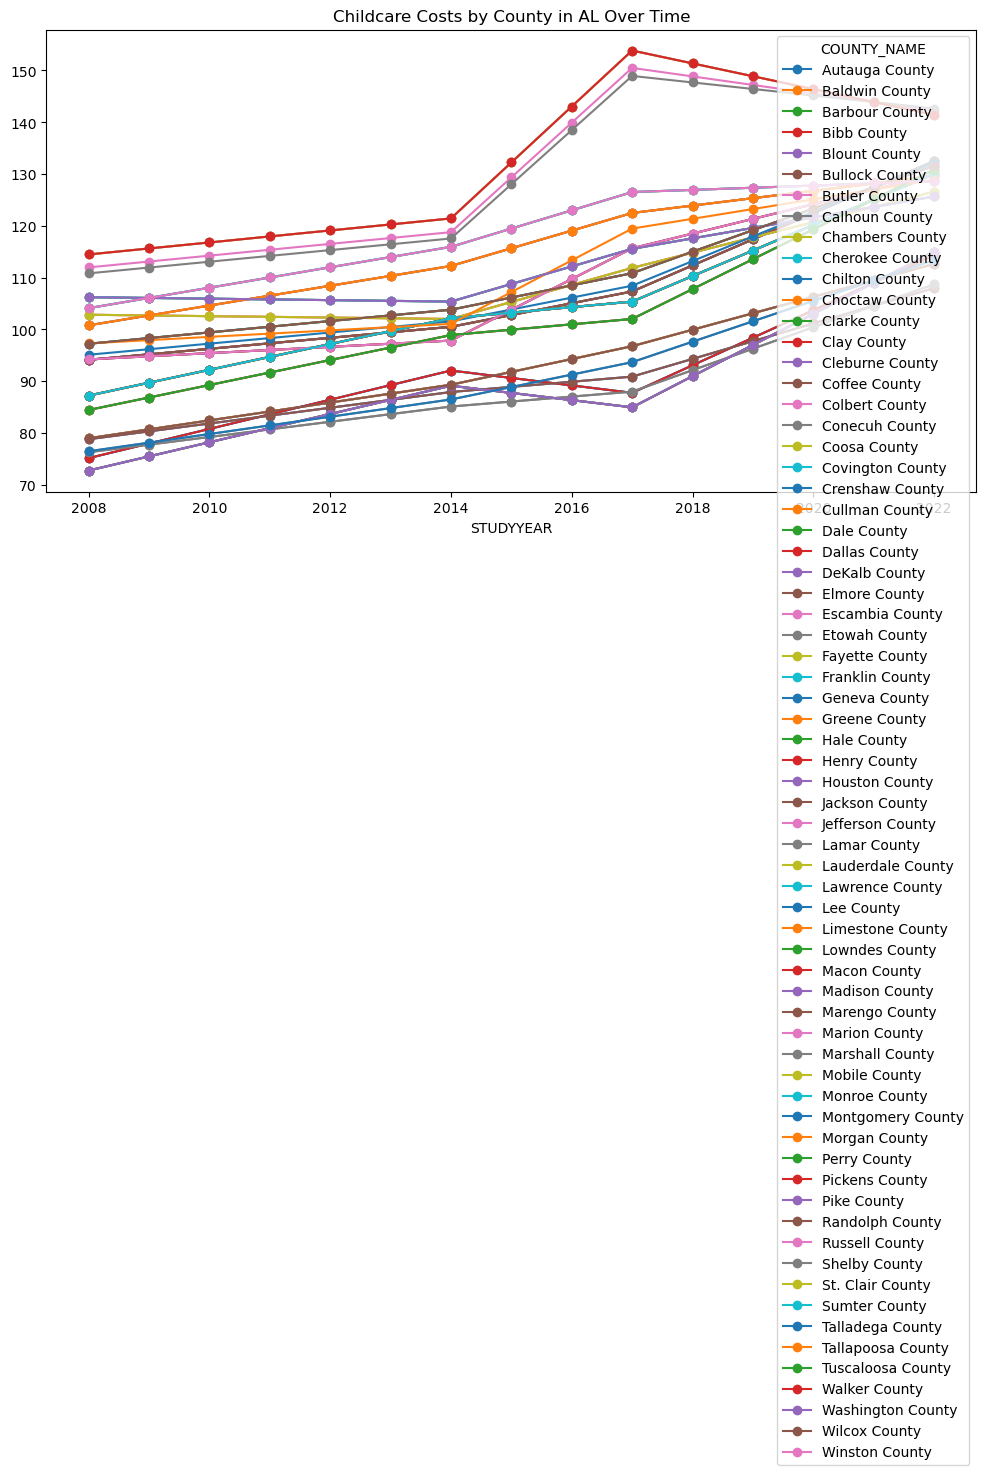

In [9]:
# Example for one state, say 'AL'
df_al = df[df['STATE_ABBREVIATION'] == 'AL'].copy()
df_al.groupby(['COUNTY_NAME','STUDYYEAR'])['CCC'].mean().unstack(level=0).plot(
    figsize=(12,6), marker='o', title='Childcare Costs by County in AL Over Time'
)

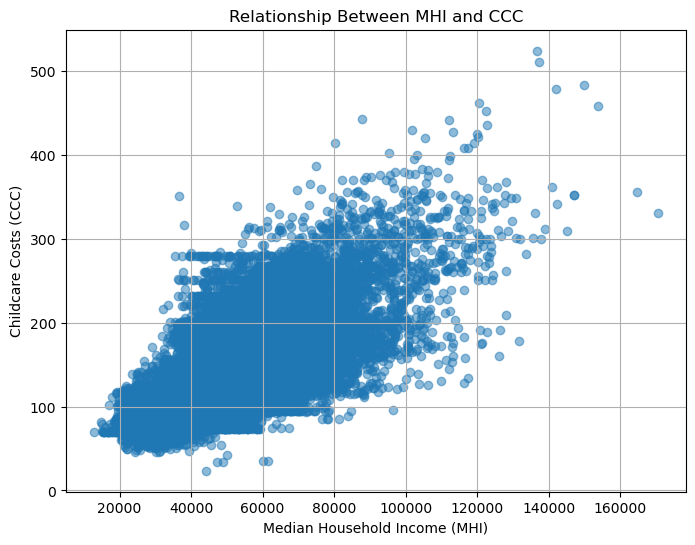

In [10]:
plt.figure(figsize=(8,6))
plt.scatter(df['MHI'], df['CCC'], alpha=0.5)
plt.title('Relationship Between MHI and CCC')
plt.xlabel('Median Household Income (MHI)')
plt.ylabel('Childcare Costs (CCC)')
plt.grid(True)
plt.show()

In [11]:
corr_value = df['MHI'].corr(df['CCC'])
print(f'Correlation between MHI and CCC: {corr_value}')

Correlation between MHI and CCC: 0.6774590745926549


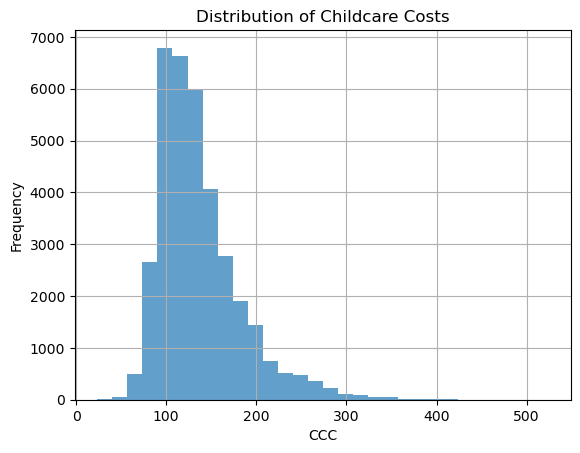

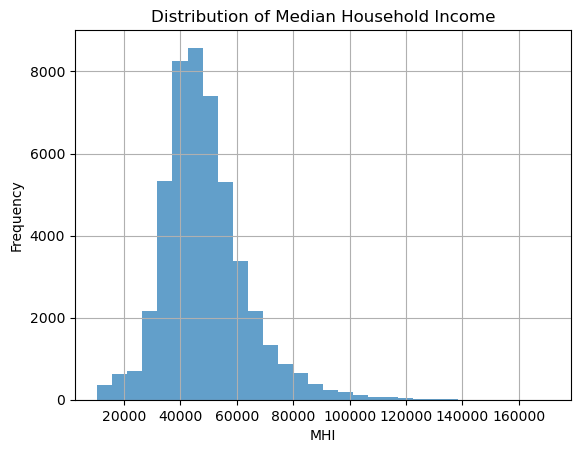

In [12]:
df['CCC'].hist(bins=30, alpha=0.7)
plt.title('Distribution of Childcare Costs')
plt.xlabel('CCC')
plt.ylabel('Frequency')
plt.show()

df['MHI'].hist(bins=30, alpha=0.7)
plt.title('Distribution of Median Household Income')
plt.xlabel('MHI')
plt.ylabel('Frequency')
plt.show()

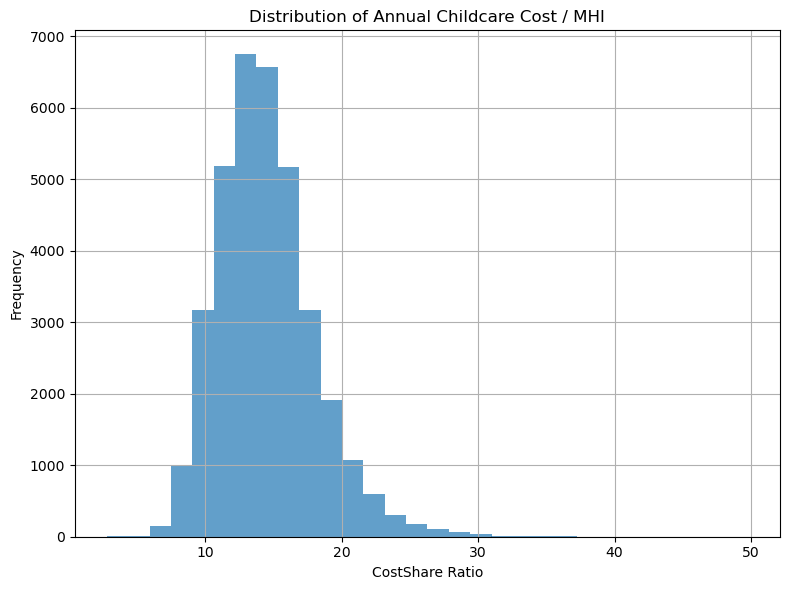

In [13]:
import matplotlib.pyplot as plt

# Percent of median household income spent on childcare
df['CostShare'] = (df['CCC'] * 52) / df['MHI'] * 100

# Drop any rows with missing or zero MHI to avoid division errors or infinite values
df = df.dropna(subset=['CostShare'])
df = df[df['MHI'] != 0]

# Histogram to show the distribution of CostShare
plt.figure(figsize=(8,6))
df['CostShare'].hist(bins=30, alpha=0.7)
plt.title('Distribution of Annual Childcare Cost / MHI')
plt.xlabel('CostShare Ratio')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

## Milestone 2

### PowerPoint Visuals

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
from matplotlib.colors import Normalize
import matplotlib.cm as cm

# Create placeholder visuals for each slide

# Slide 1: Title Slide (no visual needed)

# Slide 2: Introduction Slide (simple visual emphasizing childcare cost burden)
fig, ax = plt.subplots(figsize=(6,4))
ax.bar(['High Income', 'Middle Income', 'Low Income'], [8, 12, 22])
ax.set_ylabel('Childcare Cost as % of Income')
ax.set_title('Childcare Cost Burden by Income Level')
plt.tight_layout()
plt.savefig('introduction_slide.png')
plt.close()

# Slide 3: Data and Methodology Overview (simple process diagram)
fig, ax = plt.subplots(figsize=(6,3))
ax.text(0.1, 0.6, "NDCP Dataset\n+\nCensus MHI Data", fontsize=12, bbox=dict(facecolor='lightblue'))
ax.annotate("", xy=(0.5, 0.55), xytext=(0.3, 0.55),
            arrowprops=dict(arrowstyle="->"))
ax.text(0.6, 0.6, "Compute CostShare", fontsize=12, bbox=dict(facecolor='lightgreen'))
ax.axis('off')
plt.tight_layout()
plt.savefig('methodology_slide.png')
plt.close()

# Slide 4: Geographical Visualization Slide (Placeholder heatmap)
fig, ax = plt.subplots(figsize=(6,4))
states = ['State A', 'State B', 'State C', 'State D', 'State E']
costshare = [15, 18, 12, 20, 22]
ax.barh(states, costshare, color='orange')
ax.set_xlabel('CostShare %')
ax.set_title('Childcare Affordability by State')
plt.tight_layout()
plt.savefig('geographical_slide.png')
plt.close()

# Slide 5: Trend Analysis Slide (Simple line chart)
years = np.arange(2018, 2023)
costs = [150, 160, 170, 180, 190]
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(years, costs, marker='o')
ax.set_xlabel('Year')
ax.set_ylabel('Weekly Childcare Cost ($)')
ax.set_title('Trend in Weekly Childcare Costs')
plt.tight_layout()
plt.savefig('trend_analysis_slide.png')
plt.close()

# Slide 6: Income and Affordability Slide (Boxplots)
data_income = np.random.normal(60000, 15000, 100)
data_ccc = np.random.normal(150, 40, 100)
fig, ax = plt.subplots(figsize=(6,4))
ax.boxplot([data_income, data_ccc], labels=['Income ($)', 'Childcare Cost ($)'])
ax.set_title('Income vs. Childcare Cost Distribution')
plt.tight_layout()
plt.savefig('income_affordability_slide.png')
plt.close()

# Slide 7: Policy Implication Slide (Table graphic)
fig, ax = plt.subplots(figsize=(6,2))
ax.axis('tight')
ax.axis('off')
table_data = [['State', 'CostShare', 'Urgency'],
              ['State A', '22%', 'High'],
              ['State B', '20%', 'High'],
              ['State C', '15%', 'Medium']]
ax.table(cellText=table_data, colLabels=None, cellLoc='center', loc='center')
plt.title('Policy Intervention Priorities')
plt.tight_layout()
plt.savefig('policy_slide.png')
plt.close()

# Slide 8: Conclusion Slide (Simple call-to-action graphic)
fig, ax = plt.subplots(figsize=(6,3))
ax.text(0.5, 0.5, 'Act Now to Improve\nChildcare Affordability!', fontsize=14,
        ha='center', va='center', bbox=dict(facecolor='red', alpha=0.5))
ax.axis('off')
plt.tight_layout()
plt.savefig('conclusion_slide.png')
plt.close()

"introduction_slide.png", "methodology_slide.png", "geographical_slide.png", "trend_analysis_slide.png", "income_affordability_slide.png", "policy_slide.png", "conclusion_slide.png"

('introduction_slide.png',
 'methodology_slide.png',
 'geographical_slide.png',
 'trend_analysis_slide.png',
 'income_affordability_slide.png',
 'policy_slide.png',
 'conclusion_slide.png')

### Interactive Dashboard Visualizations

In [18]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

# --- Page 2: Affordability Map (Plotly Choropleth Placeholder) ---
df_states = pd.DataFrame({
    'state_code': ['AL', 'AK', 'AZ', 'AR', 'CA'],
    'CostShare': [12, 15, 20, 10, 18]
})

fig_map = px.choropleth(df_states,
                        locations='state_code',
                        locationmode="USA-states",
                        color='CostShare',
                        scope="usa",
                        color_continuous_scale="OrRd",
                        labels={'CostShare':'CostShare %'},
                        title='Childcare Affordability by State')
fig_map.write_image('dashboard_page2_affordability_map.png')

# --- Page 3: Historical Trends (Interactive time-series mockup) ---
years = np.arange(2018, 2023)
df_trends = pd.DataFrame({
    'Year': np.tile(years, 3),
    'Metric': np.repeat(['CCC', 'MHI', 'CostShare'], len(years)),
    'Value': np.random.randint(50, 200, len(years)*3)
})

fig_trends = px.line(df_trends, x='Year', y='Value', color='Metric', markers=True,
                     title="Historical Trends: CCC, MHI, CostShare")
fig_trends.write_image('dashboard_page3_historical_trends.png')

# --- Page 4: Statistical Insights (Combined Histogram/Boxplot Placeholder) ---
ccc = np.random.normal(150, 30, 200)
mhi = np.random.normal(60000, 12000, 200)
costshare = np.random.normal(15, 5, 200)

fig_stats = go.Figure()
fig_stats.add_trace(go.Histogram(x=ccc, name='CCC', opacity=0.6))
fig_stats.add_trace(go.Histogram(x=mhi, name='MHI', opacity=0.6))
fig_stats.add_trace(go.Histogram(x=costshare, name='CostShare', opacity=0.6))
fig_stats.update_layout(barmode='overlay',
                        title='Distributions of CCC, MHI, and CostShare',
                        xaxis_title='Values',
                        yaxis_title='Frequency')
fig_stats.write_image('dashboard_page4_statistical_insights.png')

# --- Page 5: Policy Focus Areas (Interactive Data Table Placeholder) ---
df_policy = pd.DataFrame({
    'State': ['State A', 'State B', 'State C'],
    'County': ['County 1', 'County 2', 'County 3'],
    'CostShare %': [22, 20, 18],
    'Urgency': ['High', 'High', 'Medium']
})

fig_policy = go.Figure(data=[go.Table(
    header=dict(values=list(df_policy.columns),
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[df_policy[col] for col in df_policy.columns],
               fill_color='lavender',
               align='left'))
])
fig_policy.update_layout(title="Counties/States Ranked by Affordability Severity")
fig_policy.write_image('dashboard_page5_policy_focus_areas.png')

### Infographic Visualizations

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Set a consistent figure size for the infographic
fig, axs = plt.subplots(4, 1, figsize=(8, 16))
fig.suptitle("Childcare Affordability in the U.S. – Key Insights & Policy Directions", fontsize=16, y=0.95)

# --- Section 1: Visual Statistic ---
avg_ccc = 180
avg_mhi = 60000
most_affordable = 6  # %
least_affordable = 25  # %

axs[0].barh(['Avg CCC ($/week)', 'Avg MHI ($/yr)'], [avg_ccc, avg_mhi], color=['skyblue', 'lightgreen'])
axs[0].set_title('Childcare Cost vs. Median Household Income', fontsize=12)
axs[0].set_xlim(0, 70000)
axs[0].text(avg_ccc + 500, 0, f"${avg_ccc}", va='center')
axs[0].text(avg_mhi + 1000, 1, f"${avg_mhi}", va='center')
axs[0].axis('off')

# --- Section 2: Key Insights (Textual) ---
axs[1].text(0.05, 0.8, "• Childcare costs vary widely across counties.", fontsize=12)
axs[1].text(0.05, 0.6, "• Some counties spend over 20% of income on care.", fontsize=12)
axs[1].text(0.05, 0.4, "• Affordability tends to be worse in lower-income areas.", fontsize=12)
axs[1].text(0.05, 0.2, f"• Cost burden ranges from {most_affordable}% to {least_affordable}%.", fontsize=12)
axs[1].set_title("Key Insights", fontsize=12)
axs[1].axis('off')

# --- Section 3: Map of Affordability (Placeholder Chart) ---
states = ['A', 'B', 'C', 'D', 'E']
costshare = [12, 18, 21, 15, 23]
colors = ['green' if cs < 20 else 'red' for cs in costshare]

axs[2].bar(states, costshare, color=colors)
axs[2].axhline(20, color='gray', linestyle='--')
axs[2].text(4.2, 20.5, 'Critical Threshold (20%)', fontsize=10)
axs[2].set_ylim(0, 30)
axs[2].set_ylabel('CostShare %')
axs[2].set_title("Counties Exceeding Critical Cost Threshold", fontsize=12)

# --- Section 4: Policy Recommendations (Text Blocks) ---
axs[3].text(0.05, 0.8, "Expand childcare subsidies in high-burden counties", fontsize=12)
axs[3].text(0.05, 0.6, "Offer tax incentives for providers and families", fontsize=12)
axs[3].text(0.05, 0.4, "Invest in public childcare infrastructure", fontsize=12)
axs[3].text(0.05, 0.2, "Support flexible work policies for caregivers", fontsize=12)
axs[3].set_title("Policy Recommendations", fontsize=12)
axs[3].axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig("infographic_childcare_affordability.png")
plt.close()

"infographic_childcare_affordability.png"

'infographic_childcare_affordability.png'

## Milestone 3

### PowerPoint Visuals

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# --- Preprocessing ---
# Calculate CostShare
df['CostShare'] = (df['CCC'] * 52) / df['MHI'] * 100

# Filter for latest year
latest_year = df['STUDYYEAR'].max()
df_latest = df[df['STUDYYEAR'] == latest_year].copy()

# --- Slide 2: Introduction Slide ---
df_latest['income_group'] = pd.qcut(df_latest['MHI'], q=3, labels=["Low Income", "Middle Income", "High Income"])
cost_burden_by_group = df_latest.groupby("income_group")["CostShare"].mean().reindex(["High Income", "Middle Income", "Low Income"])

fig, ax = plt.subplots(figsize=(6, 4))
ax.bar(cost_burden_by_group.index, cost_burden_by_group.values)
ax.set_ylabel('Childcare Cost as % of Income')
ax.set_title('Childcare Cost Burden by Income Level')
plt.tight_layout()
plt.savefig("introduction_slide.png")
plt.close()

# --- Slide 3: Methodology Slide ---
fig, ax = plt.subplots(figsize=(6, 3))
ax.text(0.1, 0.6, "NDCP Dataset\n+\nCensus MHI Data", fontsize=12, bbox=dict(facecolor='lightblue'))
ax.annotate("", xy=(0.5, 0.55), xytext=(0.3, 0.55), arrowprops=dict(arrowstyle="->"))
ax.text(0.6, 0.6, "Compute CostShare", fontsize=12, bbox=dict(facecolor='lightgreen'))
ax.axis('off')
plt.tight_layout()
plt.savefig("methodology_slide.png")
plt.close()

# --- Slide 4: Geographical Slide ---
state_costshare = df_latest.groupby("STATE_ABBREVIATION")["CostShare"].mean().sort_values(ascending=False).head(10)

fig, ax = plt.subplots(figsize=(6, 4))
ax.barh(state_costshare.index, state_costshare.values, color='orange')
ax.set_xlabel('CostShare %')
ax.set_title('Top 10 States by Childcare Affordability Burden')
plt.tight_layout()
plt.savefig("geographical_slide.png")
plt.close()

# --- Slide 5: Trend Analysis Slide ---
df_yearly = df.groupby("STUDYYEAR")["CCC"].mean()

fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(df_yearly.index, df_yearly.values, marker='o')
ax.set_xlabel('Year')
ax.set_ylabel('Weekly Childcare Cost ($)')
ax.set_title('Trend in Weekly Childcare Costs')
plt.tight_layout()
plt.savefig("trend_analysis_slide.png")
plt.close()

# --- Slide 6: Income vs. Childcare Cost (Boxplots) ---
# Create income quartiles
df_latest['Income_Quartile'] = pd.qcut(df_latest['MHI'], 4, labels=[
    'Lowest Income Quartile', 'Lower-Middle Quartile',
    'Upper-Middle Quartile', 'Highest Income Quartile'
])

# Plot updated boxplot
fig, ax = plt.subplots(figsize=(8, 5))
sns.boxplot(data=df_latest, x='Income_Quartile', y='CostShare', ax=ax, palette='pastel')
ax.set_title('Childcare Cost Burden by Income Quartile', fontsize=14)
ax.set_xlabel('Income Quartile', fontsize=12)
ax.set_ylabel('CostShare (% of Income)', fontsize=12)
ax.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.savefig("income_affordability_slide_updated.png")
plt.close()

# --- Slide 7: Policy Implication Slide ---
top_states = state_costshare.head(3).reset_index()
urgency = ["High", "High", "Medium"]
table_data = [["State", "CostShare", "Urgency"]] + list(zip(
    top_states["STATE_ABBREVIATION"],
    top_states["CostShare"].round(1).astype(str) + "%",
    urgency
))

fig, ax = plt.subplots(figsize=(6, 2))
ax.axis('tight')
ax.axis('off')
ax.table(cellText=table_data, colLabels=None, cellLoc='center', loc='center')
plt.title('Policy Intervention Priorities')
plt.tight_layout()
plt.savefig("policy_slide.png")
plt.close()

# --- Slide 8: Conclusion Slide ---
fig, ax = plt.subplots(figsize=(6, 3))
ax.text(0.5, 0.5, 'Act Now to Improve\nChildcare Affordability!', fontsize=14,
        ha='center', va='center', bbox=dict(facecolor='red', alpha=0.5))
ax.axis('off')
plt.tight_layout()
plt.savefig("conclusion_slide.png")
plt.close()

### Interactive Dashboard Visualizations

In [48]:
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots

# --- Page 2: Affordability Map (Real Data Choropleth) ---
df_latest = df[df["STUDYYEAR"] == df["STUDYYEAR"].max()].copy()
df_latest["CostShare"] = (df_latest["CCC"] * 52) / df_latest["MHI"] * 100

df_states = df_latest.groupby("STATE_ABBREVIATION")["CostShare"].mean().reset_index()
df_states.rename(columns={"STATE_ABBREVIATION": "state_code"}, inplace=True)

fig_map = px.choropleth(df_states,
                        locations="state_code",
                        locationmode="USA-states",
                        color="CostShare",
                        scope="usa",
                        color_continuous_scale="OrRd",
                        labels={"CostShare": "CostShare %"},
                        title="Childcare Affordability by State")
fig_map.write_image("dashboard_page2_affordability_map.png")

# --- Page 3: Historical Trends (Real Data Time Series) ---
df_yearly = df.groupby("STUDYYEAR")[["CCC", "MHI"]].mean().reset_index()
df_yearly["CostShare"] = (df_yearly["CCC"] * 52) / df_yearly["MHI"] * 100

df_trends = pd.melt(df_yearly,
                    id_vars="STUDYYEAR",
                    value_vars=["CCC", "MHI", "CostShare"],
                    var_name="Metric",
                    value_name="Value")

fig_trends = px.line(df_trends, x="STUDYYEAR", y="Value", color="Metric", markers=True,
                     title="Historical Trends: CCC, MHI, CostShare")
fig_trends.write_image("dashboard_page3_historical_trends.png")

# --- Page 4: Statistical Insights (Real Data Distributions) ---
fig_stats = make_subplots(rows=1, cols=3, subplot_titles=["CCC Distribution", "MHI Distribution", "CostShare Distribution"])

# CCC Histogram
fig_stats.add_trace(
    go.Histogram(
        x=df_latest["CCC"],
        name="CCC",
        marker=dict(line=dict(width=1, color="black")),
        opacity=0.75,
        showlegend=False
    ),
    row=1, col=1
)

# MHI Histogram
fig_stats.add_trace(
    go.Histogram(
        x=df_latest["MHI"],
        name="MHI",
        marker=dict(line=dict(width=1, color="black")),
        opacity=0.75,
        showlegend=False
    ),
    row=1, col=2
)

# CostShare Histogram
fig_stats.add_trace(
    go.Histogram(
        x=df_latest["CostShare"],
        name="CostShare",
        marker=dict(line=dict(width=1, color="black")),
        opacity=0.75,
        showlegend=False
    ),
    row=1, col=3
)

# Update layout
fig_stats.update_layout(
    title_text="Distributions of CCC, MHI, and CostShare",
    height=400,
    width=1200
)

# Shared y-axis title manually applied
fig_stats.update_yaxes(title_text="Frequency", row=1, col=1)
fig_stats.update_xaxes(title_text="CCC", row=1, col=1)
fig_stats.update_xaxes(title_text="MHI", row=1, col=2)
fig_stats.update_xaxes(title_text="CostShare", row=1, col=3)

# Save image
fig_stats.write_image("dashboard_page4_statistical_insights.png")

# --- Page 5: Policy Focus Areas (Top 3 Counties by CostShare) ---
top_counties = df_latest.copy()
top_counties = top_counties.sort_values("CostShare", ascending=False)
top_counties = top_counties[["STATE_ABBREVIATION", "COUNTY_NAME", "CostShare"]].dropna().head(3)
top_counties["Urgency"] = ["High", "High", "Medium"]
top_counties.columns = ["State", "County", "CostShare %", "Urgency"]
top_counties["CostShare %"] = top_counties["CostShare %"].round(1)

fig_policy = go.Figure(data=[go.Table(
    header=dict(values=list(top_counties.columns),
                fill_color="paleturquoise",
                align="left"),
    cells=dict(values=[top_counties[col] for col in top_counties.columns],
               fill_color="lavender",
               align="left"))
])
fig_policy.update_layout(title="Counties/States Ranked by Affordability Severity")
fig_policy.write_image("dashboard_page5_policy_focus_areas.png")

### Infographic Visualizations

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# --- Ensure CostShare column exists ---
df['CostShare'] = (df['CCC'] * 52) / df['MHI'] * 100
df_latest = df[df['STUDYYEAR'] == df['STUDYYEAR'].max()].copy()

# --- Calculate summary statistics ---
avg_ccc = round(df_latest['CCC'].mean(), 2)
avg_mhi = round(df_latest['MHI'].mean(), 0)
most_affordable = round(df_latest['CostShare'].min(), 1)
least_affordable = round(df_latest['CostShare'].max(), 1)

# --- Select sample states or counties exceeding threshold ---
top_counties = df_latest[['STATE_ABBREVIATION', 'COUNTY_NAME', 'CostShare']].dropna()
top_counties = top_counties.groupby('STATE_ABBREVIATION')['CostShare'].mean().sort_values(ascending=False).head(5)
state_codes = top_counties.index.tolist()
costshare_vals = top_counties.values
colors = ['green' if val < 20 else 'red' for val in costshare_vals]

# --- Create infographic layout ---
fig, axs = plt.subplots(4, 1, figsize=(8, 16))
fig.suptitle("Childcare Affordability in the U.S. – Key Insights & Policy Directions", fontsize=16, y=0.95)

# --- Section 1: Visual Statistic ---
axs[0].barh(['Avg CCC ($/week)', 'Avg MHI ($/yr)'], [avg_ccc, avg_mhi], color=['skyblue', 'lightgreen'])
axs[0].set_title('Childcare Cost vs. Median Household Income', fontsize=12)
axs[0].set_xlim(0, avg_mhi + 10000)
axs[0].text(avg_ccc + 500, 0, f"${avg_ccc}", va='center')
axs[0].text(avg_mhi + 1000, 1, f"${avg_mhi}", va='center')
axs[0].axis('off')

# --- Section 2: Key Insights (Textual) ---
axs[1].text(0.05, 0.8, "• Childcare costs vary widely across counties.", fontsize=12)
axs[1].text(0.05, 0.6, "• Some counties spend over 20% of income on care.", fontsize=12)
axs[1].text(0.05, 0.4, "• Affordability tends to be worse in lower-income areas.", fontsize=12)
axs[1].text(0.05, 0.2, f"• Cost burden ranges from {most_affordable}% to {least_affordable}%.", fontsize=12)
axs[1].set_title("Key Insights", fontsize=12)
axs[1].axis('off')

# --- Section 3: Map of Affordability (Top States Chart) ---
axs[2].bar(state_codes, costshare_vals, color=colors)
axs[2].axhline(20, color='gray', linestyle='--')
axs[2].text(len(state_codes) - 0.5, 20.5, 'Critical Threshold (20%)', fontsize=10)
axs[2].set_ylim(0, max(costshare_vals) + 5)
axs[2].set_ylabel('CostShare %')
axs[2].set_title("States Exceeding Critical Cost Threshold", fontsize=12)

# --- Section 4: Policy Recommendations (Text Blocks) ---
axs[3].text(0.05, 0.8, "Expand childcare subsidies in high-burden counties", fontsize=12)
axs[3].text(0.05, 0.6, "Offer tax incentives for providers and families", fontsize=12)
axs[3].text(0.05, 0.4, "Invest in public childcare infrastructure", fontsize=12)
axs[3].text(0.05, 0.2, "Support flexible work policies for caregivers", fontsize=12)
axs[3].set_title("Policy Recommendations", fontsize=12)
axs[3].axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig("infographic_childcare_affordability.png")
plt.close()